In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [37]:
def data_overview():
    print("Rows: ", df.shape[0])
    print("Columns:", df.shape[1])
    print("Missing value number: ", df.isnull().sum().values.sum())
    print("\nUnique values", df.nunique())
    
data_overview()

Rows:  7043
Columns: 21
Missing value number:  0

Unique values customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [38]:
df.TotalCharges.isnull().sum()

0

In [39]:
# count the number of unique values in terms of categorical attribute
print(df['gender'].value_counts())
print('\n')
print(df['SeniorCitizen'].value_counts())
print('\n')
print(df['Partner'].value_counts())
print('\n')
print(df['PaymentMethod'].value_counts())
print('\n')

Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64




In [40]:
# deal with df['TotalCharges']
# replace whitespace with NAN and convert it from object to float
df['TotalCharges'] = df.TotalCharges.replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

# check again
df['TotalCharges'].dtype

dtype('float64')

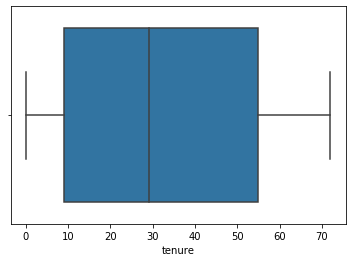

In [41]:
# check whether there are outliers in terms of numerical attributes (3)
# 1.boxplot
sns.boxplot(df['tenure'])

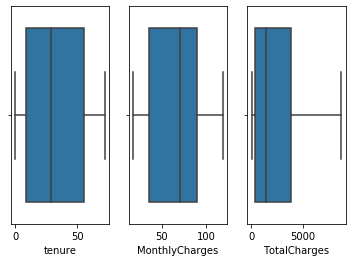

In [42]:
fig, axs = plt.subplots(ncols=3)
sns.boxplot(df['tenure'], ax=axs[0])
sns.boxplot(df['MonthlyCharges'], ax=axs[1])
sns.boxplot(df['TotalCharges'], ax = axs[2])

In [43]:
# check whether there are outliers in terms of numerical attributes (3)
# 2. IQR rules ?
def check_outliers(attribute):
    Q1 = df[attribute].quantile(0.25)
    Q3 = df[attribute].quantile(0.75)
    IQR = Q3 - Q1
    if(df[(df[attribute] < Q1-1.5*IQR) | (df[attribute] > Q3 + 1.5 * IQR)].empty):
        print("There are no outliers in "+attribute+" attribute")
    else:
        print(df[(df[attribute] < Q1-1.5*IQR) | (df[attribute] > Q3 + 1.5 * IQR)])

Id_col = ['customerID']
target_col = ['Churn']
numerical_col = df.nunique()[df.nunique() > 4].keys().tolist()
numerical_col = [col for col in numerical_col if col not in Id_col]
for col in numerical_col:
    check_outliers(col)

There are no outliers in tenure attribute
There are no outliers in MonthlyCharges attribute
There are no outliers in TotalCharges attribute


In [44]:
################################ Visualization ##################################

In [45]:
df['Churn'] = df['Churn'].replace({'Yes':'Churn', 'No':'No Churn'})

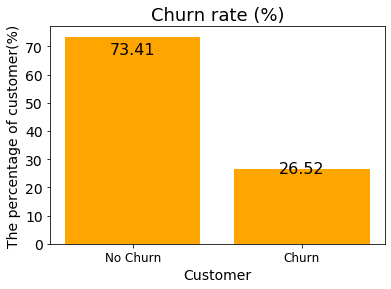

In [46]:
# churn rate 
# 7048 is total

data = (round(((df['Churn'].value_counts())/7048*100),2)).values.tolist()
label = df['Churn'].value_counts().keys().tolist()

rects1=plt.bar(label, data, color = 'orange')

plt.xticks(list(range(2)), ['No Churn', 'Churn'], fontsize=12)
plt.xlabel('Customer', fontsize=14)
plt.ylabel('The percentage of customer(%)', fontsize=14)
plt.yticks(fontsize=14)
plt.title('Churn rate (%)', fontsize=18)

def autolabel(rects, xpos='center'):
    xpos = xpos.lower()  
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()*offset[xpos], 0.9*height,
                 '{}'.format(height),ha=ha[xpos], va='bottom',fontsize=16)

autolabel(rects1, "center")


plt.show()

In [47]:
######### nominal variable ###############

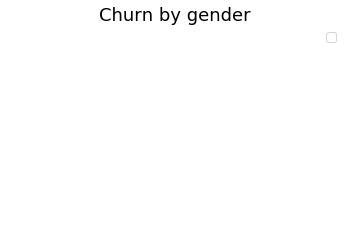

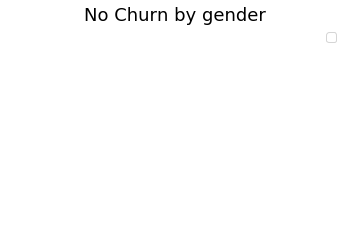

In [48]:
# # pie chart (1)
# churn by gender
churn = df[df['Churn']=="Yes"]
no_churn = df[df['Churn']=="No"]

data = churn['gender'].value_counts().values.tolist()
lab = churn['gender'].value_counts().keys().tolist()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors = ['orange', 'lightskyblue']

fig, axes = plt.subplots()
plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=90
       ,textprops={'fontsize': 14})
plt.legend(lab, loc="upper right", fontsize=12)
plt.title('Churn by gender', fontsize=18)
plt.axis('equal')
plt.show()



data = no_churn['gender'].value_counts().values.tolist()
lab = no_churn['gender'].value_counts().keys().tolist()
colors = ['lightskyblue', 'orange']

fig, axes = plt.subplots()
plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=270
       ,textprops={'fontsize': 14})
plt.legend(lab, loc="upper right", fontsize=12)
plt.title('No Churn by gender', fontsize=18)
plt.axis('equal')
plt.show()

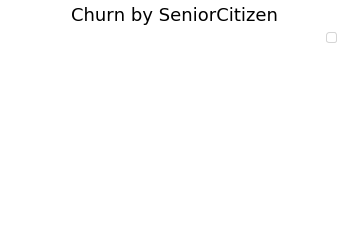

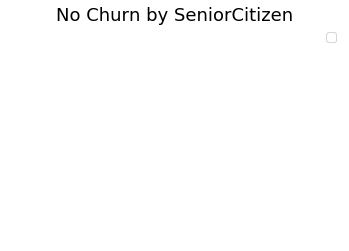

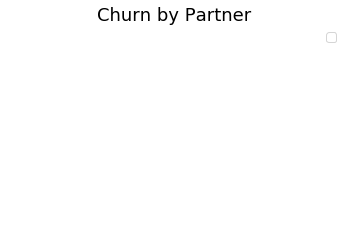

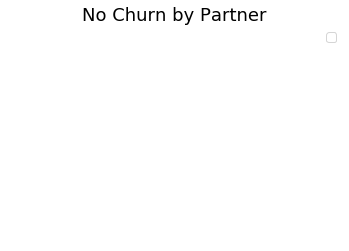

In [49]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes' , 0:'No' })

churn = df[df['Churn']=="Yes"]
no_churn = df[df['Churn']=="No"]
    
def pie_chart(col):

    data = churn[col].value_counts().values.tolist()
    lab = churn[col].value_counts().keys().tolist()

    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
    colors = ['orange', 'lightskyblue']

    fig, axes = plt.subplots()
    plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=90
           ,textprops={'fontsize': 14})
    plt.legend(lab, loc="upper right", fontsize=12)
    plt.title('Churn by '+col, fontsize=18)
    plt.axis('equal')
    plt.show()



    data = no_churn[col].value_counts().values.tolist()
    lab = no_churn[col].value_counts().keys().tolist()
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
    colors = [ 'orange','lightskyblue']

    fig, axes = plt.subplots()
    plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=90
           ,textprops={'fontsize': 14})
    plt.legend(lab, loc="upper right", fontsize=12)
    plt.title('No Churn by '+col, fontsize=18)
    plt.axis('equal')
    plt.show()

pie_chart('SeniorCitizen')
pie_chart('Partner')

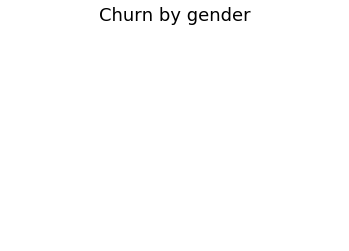

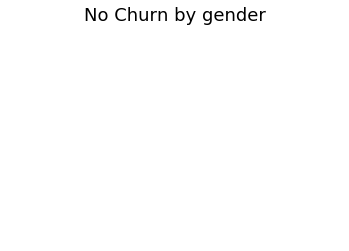

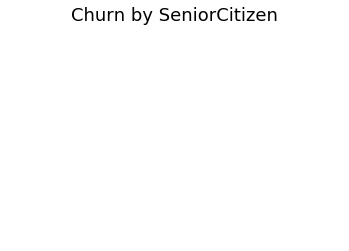

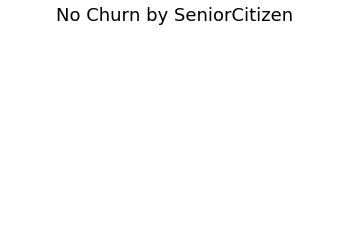

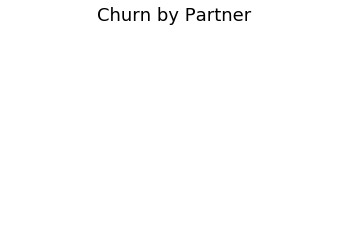

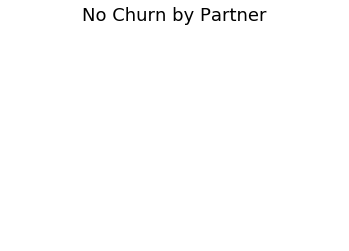

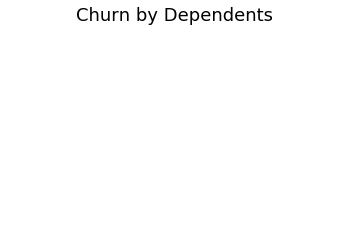

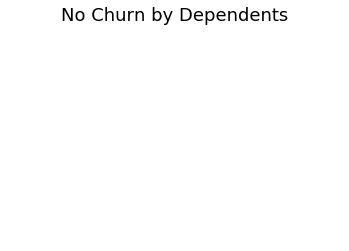

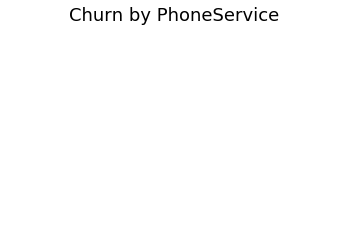

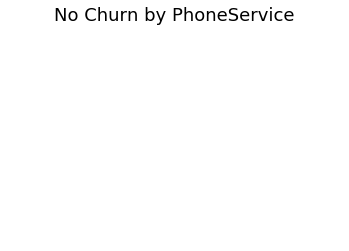

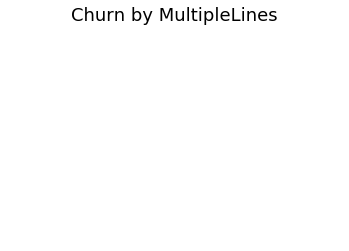

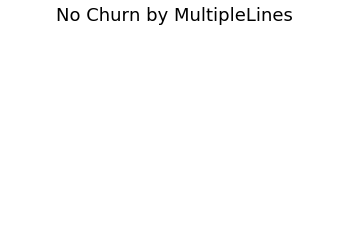

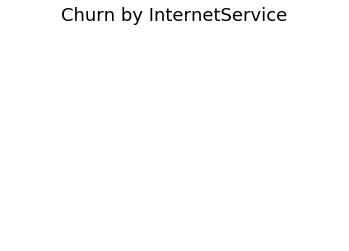

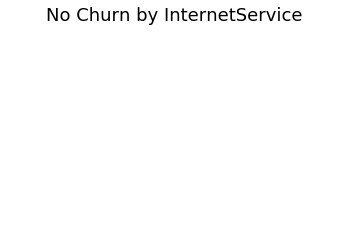

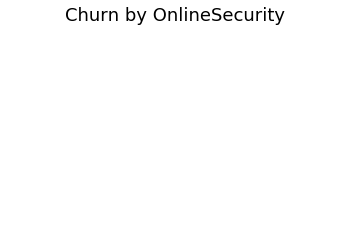

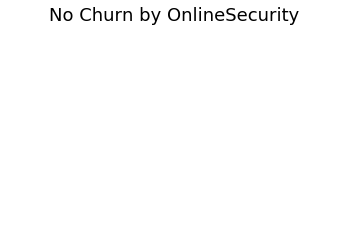

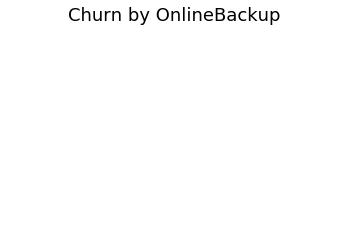

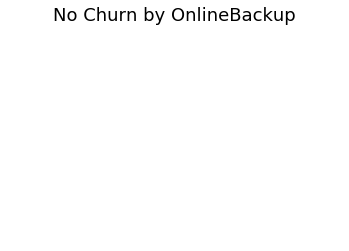

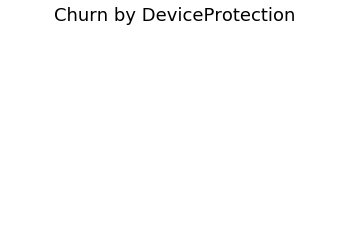

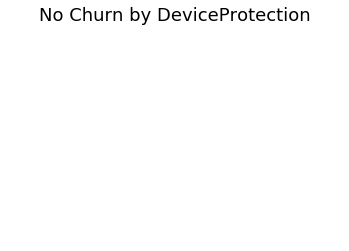

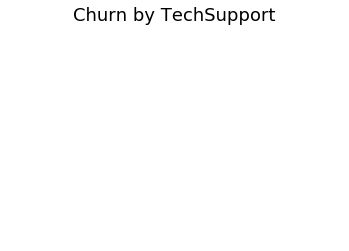

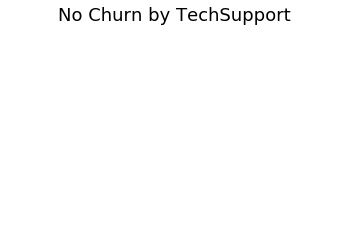

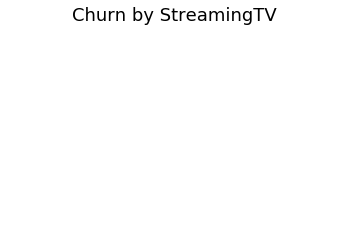

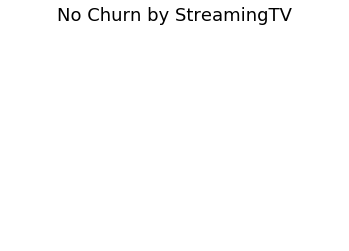

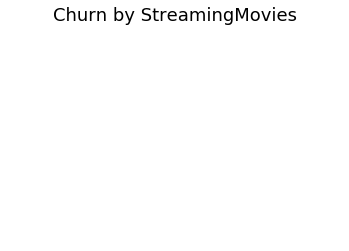

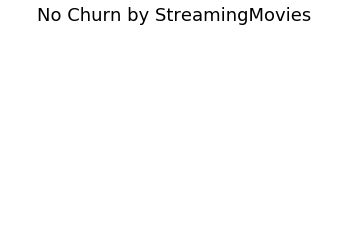

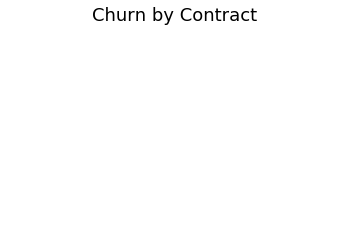

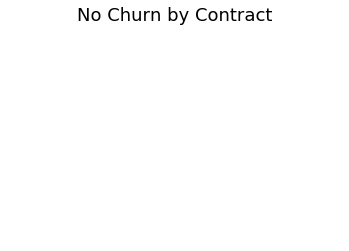

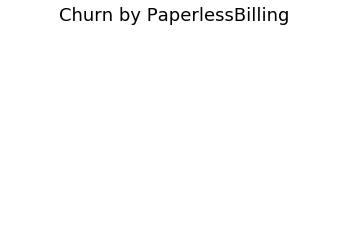

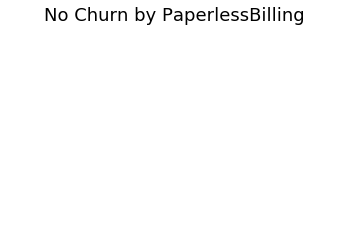

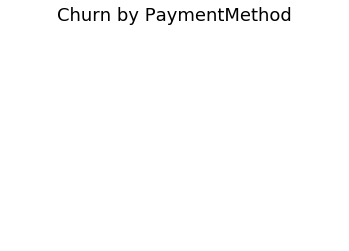

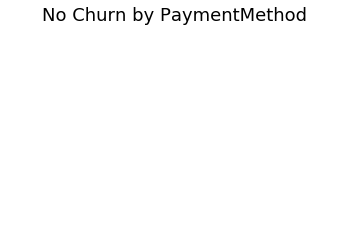

In [51]:

Id_col=['customerID']
target_col = ['Churn']
categorical_col = df.nunique()[df.nunique() <= 4].keys().tolist()
categorical_col = [col for col in categorical_col if col not in target_col]
numerical_col = [col for col in df.columns if col not in categorical_col + target_col + Id_col]

churn = df[df['Churn']=="Yes"]
no_churn = df[df['Churn']=="No"]
    
def pie_chart(col):

    data = churn[col].value_counts().values.tolist()
    lab = churn[col].value_counts().keys().tolist()

    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
    colors = ['orange', 'lightskyblue']

    fig, axes = plt.subplots()
    plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=90
           ,textprops={'fontsize': 14})
  #  plt.legend(lab, loc="upper right", fontsize=12)
    plt.title('Churn by '+col, fontsize=18)
    plt.axis('equal')
    plt.show()



    data = no_churn[col].value_counts().values.tolist()
    lab = no_churn[col].value_counts().keys().tolist()
    colors = ['orange', 'lightskyblue']

    fig, axes = plt.subplots()
    plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=90
           ,textprops={'fontsize': 14})
    #plt.legend(loc="upper right", fontsize=12)
    plt.title('No Churn by '+col, fontsize=18)
    plt.axis('equal')
    plt.show()


for col in categorical_col:
    pie_chart(col)

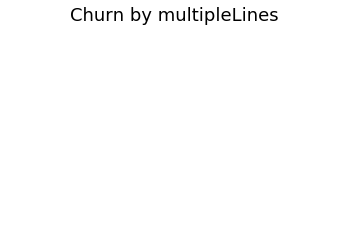

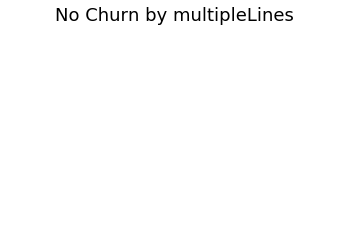

In [52]:
# # pie chart (1)
# churn by MultipleLines
churn = df[df['Churn']=="Yes"]
no_churn = df[df['Churn']=="No"]

data = churn['MultipleLines'].value_counts().values.tolist()
lab = churn['MultipleLines'].value_counts().keys().tolist()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors = ['orange', 'lightskyblue', 'lightgreen']

fig, axes = plt.subplots()
plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=-80
       ,textprops={'fontsize': 14})
#plt.legend(lab, loc="upper right", fontsize=12)
plt.title('Churn by multipleLines', fontsize=18)
plt.axis('equal')
plt.show()



data = no_churn['MultipleLines'].value_counts().values.tolist()
lab = no_churn['MultipleLines'].value_counts().keys().tolist()
colors = [ 'lightskyblue', 'orange','lightgreen']

fig, axes = plt.subplots()
plt.pie(data, labels=lab,colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=-90
       ,textprops={'fontsize': 14})
#plt.legend(lab, loc="upper right", fontsize=12)
plt.title('No Churn by multipleLines', fontsize=18)
plt.axis('equal')
plt.show()

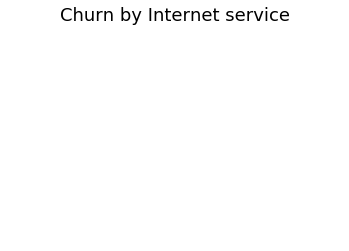

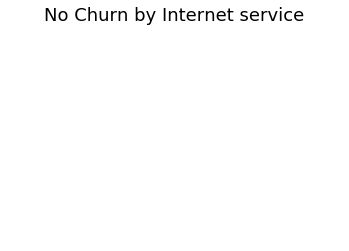

In [53]:
# # pie chart (1)
# churn by MultipleLines
churn = df[df['Churn']=="Yes"]
no_churn = df[df['Churn']=="No"]

data = churn['InternetService'].value_counts().values.tolist()
lab = churn['InternetService'].value_counts().keys().tolist()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors = ['orange', 'lightskyblue', 'lightgreen']

fig, axes = plt.subplots()
plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=-80
       ,textprops={'fontsize': 14})
#plt.legend(lab, loc="upper right", fontsize=12)
plt.title('Churn by Internet service', fontsize=18)
plt.axis('equal')
plt.show()



data = no_churn['InternetService'].value_counts().values.tolist()
lab = no_churn['InternetService'].value_counts().keys().tolist()
colors = [ 'lightskyblue', 'orange','lightgreen']

fig, axes = plt.subplots()
plt.pie(data, labels=lab,colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=90
       ,textprops={'fontsize': 14})
#plt.legend(lab, loc="upper right", fontsize=12)
plt.title('No Churn by Internet service', fontsize=18)
plt.axis('equal')
plt.show()

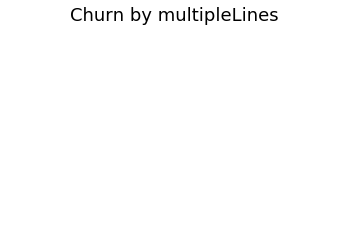

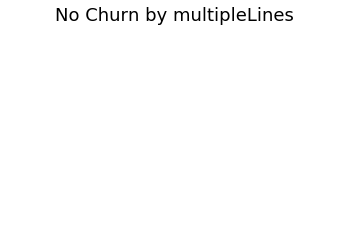

In [54]:
# churn by InternetService
churn = df[df['Churn']=="Yes"]
no_churn = df[df['Churn']=="No"]
data = churn['InternetService'].value_counts().values.tolist()
lab = churn['InternetService'].value_counts().keys().tolist()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors = ['orange', 'lightskyblue', 'lightgreen']
fig, axes = plt.subplots()
plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=-80
       ,textprops={'fontsize': 14})
plt.title('Churn by multipleLines', fontsize=18)
plt.axis('equal')
plt.show()


data = no_churn['InternetService'].value_counts().values.tolist()
lab = no_churn['InternetService'].value_counts().keys().tolist()
colors = [ 'lightskyblue', 'orange','lightgreen']
fig, axes = plt.subplots()
plt.pie(data, labels=lab,colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=90
       ,textprops={'fontsize': 14})
plt.title('No Churn by multipleLines', fontsize=18)
plt.axis('equal')
plt.show()

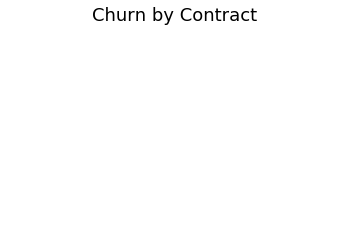

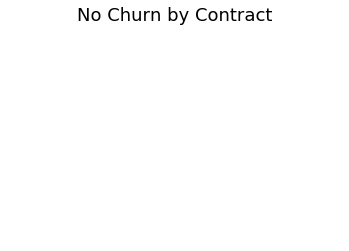

In [55]:
# churn by Contract
churn = df[df['Churn']=="Yes"]
no_churn = df[df['Churn']=="No"]

data = churn['Contract'].value_counts().values.tolist()
lab = churn['Contract'].value_counts().keys().tolist()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors = ['orange', 'lightskyblue', 'lightgreen']

fig, axes = plt.subplots()
plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=45
       ,textprops={'fontsize': 14})
plt.title('Churn by Contract', fontsize=18)
plt.axis('equal')
plt.show()


data = no_churn['Contract'].value_counts().values.tolist()
lab = no_churn['Contract'].value_counts().keys().tolist()
colors = [ 'orange', 'lightgreen','lightskyblue']

fig, axes = plt.subplots()
plt.pie(data, labels=lab,colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=100
       ,textprops={'fontsize': 14})
#plt.legend(lab, loc="upper right", fontsize=12)
plt.title('No Churn by Contract', fontsize=18)
plt.axis('equal')
plt.show()

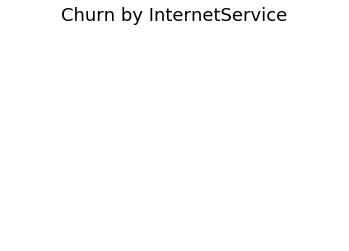

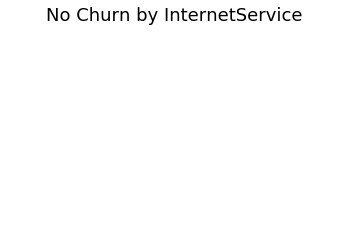

In [56]:
# churn by InternetService
churn = df[df['Churn']=="Yes"]
no_churn = df[df['Churn']=="No"]

data = churn['InternetService'].value_counts().values.tolist()
lab = churn['InternetService'].value_counts().keys().tolist()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors = ['orange', 'lightskyblue', 'lightgreen']

fig, axes = plt.subplots()
plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=45
       ,textprops={'fontsize': 14})
#plt.legend(lab, loc="upper right", fontsize=12)
plt.title('Churn by InternetService', fontsize=18)
plt.axis('equal')
plt.show()


data = no_churn['InternetService'].value_counts().values.tolist()
lab = no_churn['InternetService'].value_counts().keys().tolist()
colors = [ 'orange', 'lightgreen','lightskyblue']

fig, axes = plt.subplots()
plt.pie(data, labels=lab,colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=100
       ,textprops={'fontsize': 14})
plt.title('No Churn by InternetService', fontsize=18)
plt.axis('equal')
plt.show()

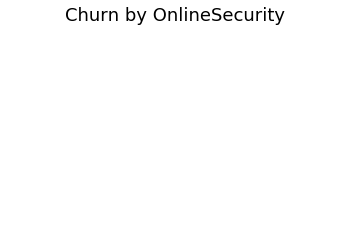

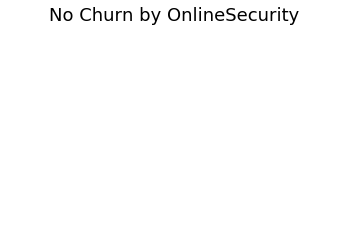

In [57]:
# churn by OnlineSecurity
churn = df[df['Churn']=="Yes"]
no_churn = df[df['Churn']=="No"]

data = churn['OnlineSecurity'].value_counts().values.tolist()
lab = churn['OnlineSecurity'].value_counts().keys().tolist()

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
colors = ['orange', 'lightskyblue', 'lightgreen']

fig, axes = plt.subplots()
plt.pie(data, labels=lab, colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=45
       ,textprops={'fontsize': 14})
plt.title('Churn by OnlineSecurity', fontsize=18)
plt.axis('equal')
plt.show()


data = no_churn['OnlineSecurity'].value_counts().values.tolist()
lab = no_churn['OnlineSecurity'].value_counts().keys().tolist()
colors = [ 'orange', 'lightgreen','lightskyblue']

fig, axes = plt.subplots()
plt.pie(data, labels=lab,colors = colors, autopct = '%1.1f%%', radius=0.8, startangle=100
       ,textprops={'fontsize': 14})
plt.title('No Churn by OnlineSecurity', fontsize=18)
plt.axis('equal')
plt.show()

In [58]:
############## numeric variable ###########################

In [59]:
numerical_col

['tenure', 'MonthlyCharges', 'TotalCharges']

Text(0, 0.5, 'Tenure')

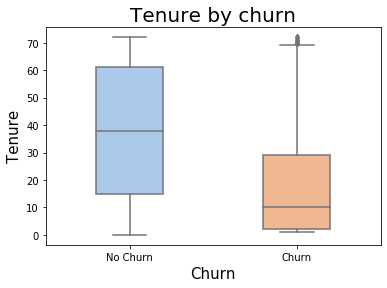

In [60]:
ax=sns.boxplot(y='tenure', x='Churn', 
                 data=df, 
                 palette="pastel",width=0.4, fliersize=4)
ax.axes.set_title("Tenure by churn",fontsize=20)
ax.set_xlabel("Churn",fontsize=15)
ax.set_ylabel("Tenure",fontsize=15)

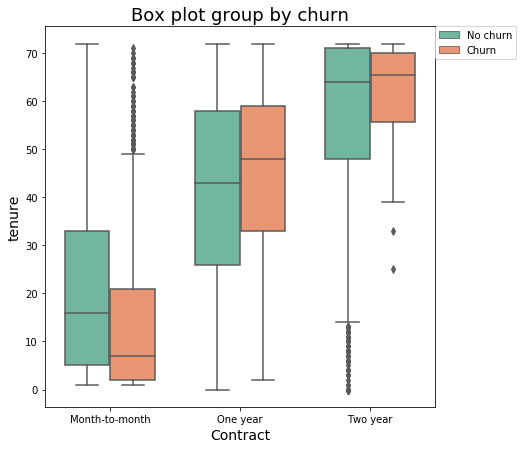

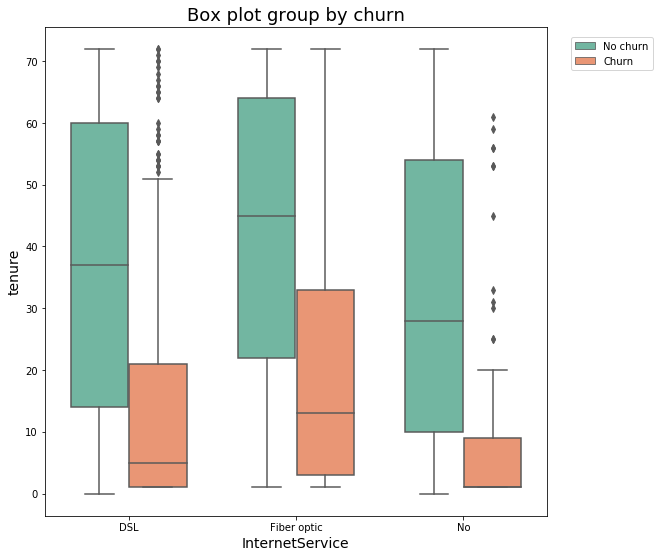

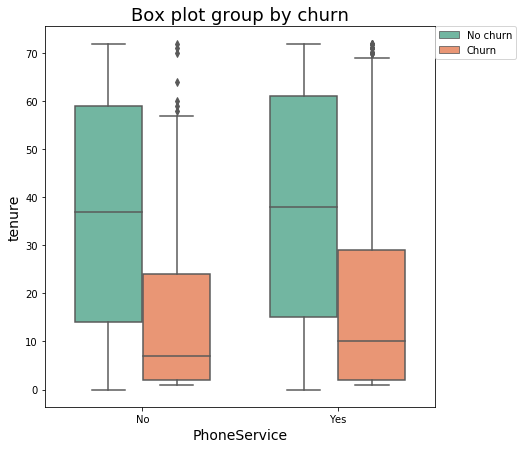

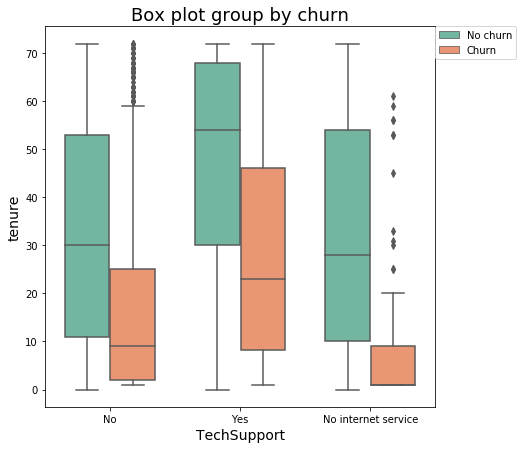

In [61]:
# tenure

plt.show()
#################################################

plt.figure(figsize=(7, 7))
ax = sns.boxplot(y='tenure', x='Contract', 
                 data=df, 
                 palette="Set2", hue='Churn',width=0.7)
ax.axes.set_title("Box plot group by churn",fontsize=18)
ax.set_xlabel("Contract",fontsize=14)
ax.set_ylabel("tenure",fontsize=14)
L= plt.legend(loc='lower right', bbox_to_anchor=(1.22, 0.9))
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

plt.show()

######################################################

plt.figure(figsize=(9, 9))
ax = sns.boxplot(y='tenure', x='InternetService', 
                 data=df, 
                 palette="Set2", hue='Churn',width=0.7)
ax.axes.set_title("Box plot group by churn",fontsize=18)
ax.set_xlabel("InternetService",fontsize=14)
ax.set_ylabel("tenure",fontsize=14)
L= plt.legend(loc='lower right', bbox_to_anchor=(1.22, 0.9))
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

plt.show()
#######################################################

plt.figure(figsize=(7, 7))
ax = sns.boxplot(y='tenure', x='PhoneService', 
                 data=df, 
                 palette="Set2", hue='Churn',width=0.7)
ax.axes.set_title("Box plot group by churn",fontsize=18)
ax.set_xlabel("PhoneService",fontsize=14)
ax.set_ylabel("tenure",fontsize=14)
L= plt.legend(loc='lower right', bbox_to_anchor=(1.22, 0.9))
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

plt.show()

#######################################################
plt.figure(figsize=(7, 7))
ax = sns.boxplot(y='tenure', x='TechSupport', 
                 data=df, 
                 palette="Set2", hue='Churn',width=0.7)
ax.axes.set_title("Box plot group by churn",fontsize=18)
ax.set_xlabel("TechSupport",fontsize=14)
ax.set_ylabel("tenure",fontsize=14)
L= plt.legend(loc='lower right', bbox_to_anchor=(1.22, 0.9))
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

plt.show()

#### PhoneService, OnlineSecurity, TechSupport

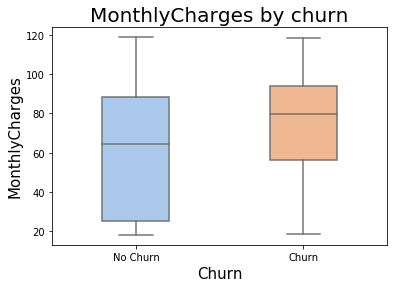

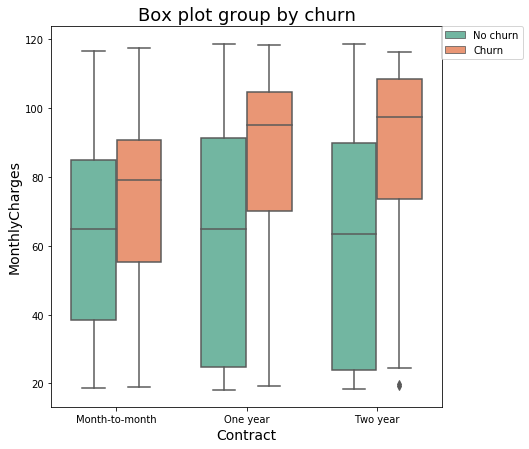

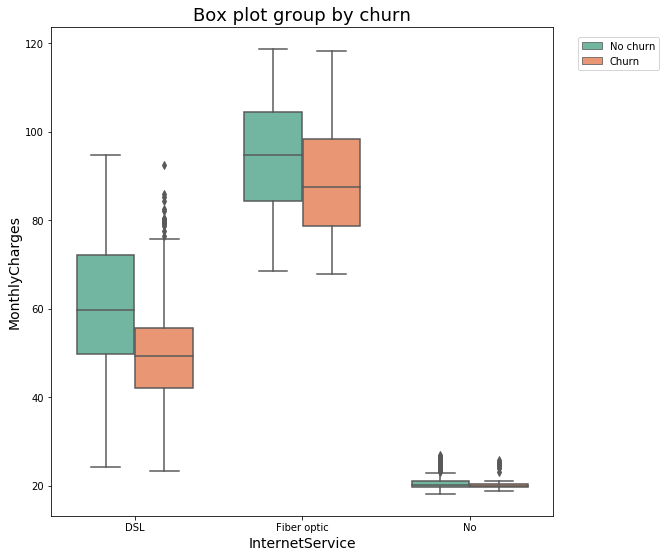

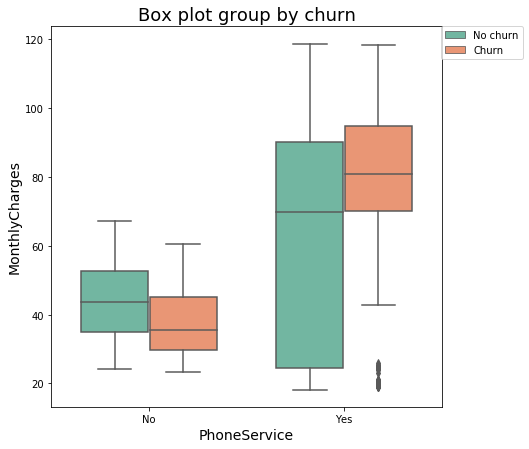

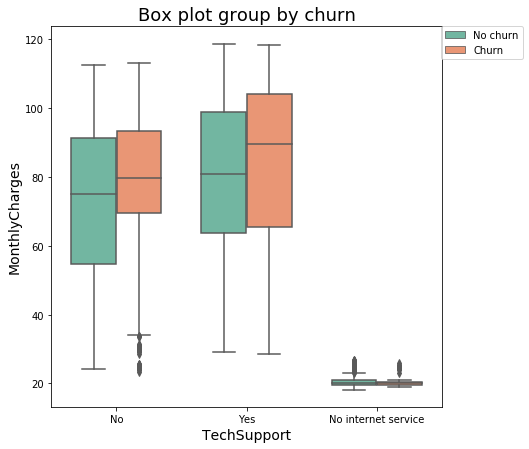

In [62]:
# monthly charge

ax=sns.boxplot(y='MonthlyCharges', x='Churn', 
                 data=df, 
                 palette="pastel",width=0.4, fliersize=4)
ax.axes.set_title("MonthlyCharges by churn",fontsize=20)
ax.set_xlabel("Churn",fontsize=15)
ax.set_ylabel("MonthlyCharges",fontsize=15)

plt.show()
#################################################

plt.figure(figsize=(7, 7))
ax = sns.boxplot(y='MonthlyCharges', x='Contract', 
                 data=df, 
                 palette="Set2", hue='Churn',width=0.7)
ax.axes.set_title("Box plot group by churn",fontsize=18)
ax.set_xlabel("Contract",fontsize=14)
ax.set_ylabel("MonthlyCharges",fontsize=14)
L= plt.legend(loc='lower right', bbox_to_anchor=(1.22, 0.9))
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

plt.show()

######################################################

plt.figure(figsize=(9, 9))
ax = sns.boxplot(y='MonthlyCharges', x='InternetService', 
                 data=df, 
                 palette="Set2", hue='Churn',width=0.7)
ax.axes.set_title("Box plot group by churn",fontsize=18)
ax.set_xlabel("InternetService",fontsize=14)
ax.set_ylabel("MonthlyCharges",fontsize=14)
L= plt.legend(loc='lower right', bbox_to_anchor=(1.22, 0.9))
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

plt.show()
#######################################################

plt.figure(figsize=(7, 7))
ax = sns.boxplot(y='MonthlyCharges', x='PhoneService', 
                 data=df, 
                 palette="Set2", hue='Churn',width=0.7)
ax.axes.set_title("Box plot group by churn",fontsize=18)
ax.set_xlabel("PhoneService",fontsize=14)
ax.set_ylabel("MonthlyCharges",fontsize=14)
L= plt.legend(loc='lower right', bbox_to_anchor=(1.22, 0.9))
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

plt.show()

#######################################################
plt.figure(figsize=(7, 7))
ax = sns.boxplot(y='MonthlyCharges', x='TechSupport', 
                 data=df, 
                 palette="Set2", hue='Churn',width=0.7)
ax.axes.set_title("Box plot group by churn",fontsize=18)
ax.set_xlabel("TechSupport",fontsize=14)
ax.set_ylabel("MonthlyCharges",fontsize=14)
L= plt.legend(loc='lower right', bbox_to_anchor=(1.22, 0.9))
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

plt.show()

#### PhoneService, OnlineSecurity, TechSupport

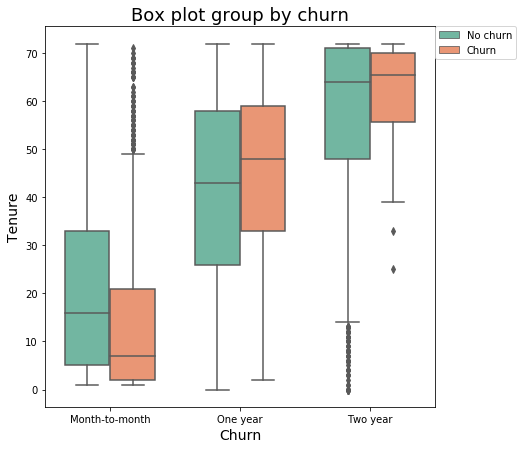

In [63]:
plt.figure(figsize=(7, 7))
ax = sns.boxplot(y='tenure', x='Contract', 
                 data=df, 
                 palette="Set2", hue='Churn',width=0.7)
ax.axes.set_title("Box plot group by churn",fontsize=18)
ax.set_xlabel("Churn",fontsize=14)
ax.set_ylabel("Tenure",fontsize=14)
L= plt.legend(loc='lower right', bbox_to_anchor=(1.22, 0.9))
L.get_texts()[0].set_text('No churn')
L.get_texts()[1].set_text('Churn')

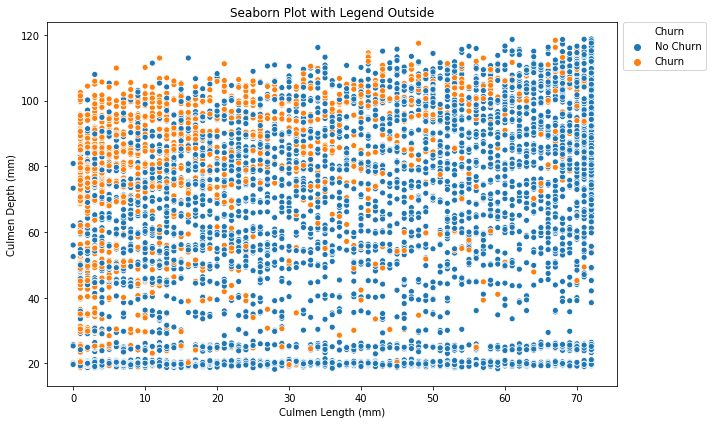

In [64]:
# scatter plot doesn't show anything
plt.figure(figsize=(10,6))
sns.scatterplot(x="tenure", 
                y="MonthlyCharges", 
                hue="Churn",
                data=df)
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Seaborn Plot with Legend Outside")
plt.tight_layout()


In [65]:
    column = 'tenure'
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          xbins=dict(start=0, size=8, end=80),
                          name = "Churn",
                          marker = dict(color = "coral",
                                        line = dict(width = .5,
                                                    color = "coral"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          xbins=dict(start=0, size=8, end=80),
                          name = "Non churn",
                          marker = dict(color='dodgerblue', 
                                        line = dict(width = .5,
                                              color = "dodgerblue"
                                             )
                                 ),
                          opacity = .9
                         )
    
 
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title ="Histogram of tenure by Churn ",
                            plot_bgcolor  = "whitesmoke",
                            paper_bgcolor = "whitesmoke",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=1
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "proportion",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=1
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

NameError: name 'go' is not defined

In [66]:

    column = 'TotalCharges'
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          xbins=dict(start=0, size=1000, end=8000),
                          name = "Churn",
                          marker = dict(color = "coral",
                                        line = dict(width = .5,
                                                    color = "coral"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn",
                          marker = dict(color='dodgerblue', 
                                        line = dict(width = .5,
                                              color = "dodgerblue"
                                             )
                                 ),
                          opacity = .9
                         )
    
 
    
    
    
    
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title ="Histogram of Total Charges by Churn ",
                            plot_bgcolor  = "whitesmoke",
                            paper_bgcolor = "whitesmoke",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=1
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "proportion",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=1
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)


NameError: name 'go' is not defined

In [ ]:
############################## Data modeling ############################

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 替代掉空白值當作null
df['TotalCharges'] = df.TotalCharges.replace(' ' , np.nan)

#看看少了哪些
print('缺失數據變為：')
print(df.TotalCharges.isnull().sum())
# 查看都是哪些類型的數據缺失
df[df.TotalCharges.isnull()]

print('清除缺失值')
df = df[df.TotalCharges.notnull()]
df = df.reset_index()[df.columns]

#再轉換一次型態
df.TotalCharges = df.TotalCharges.astype(float)


#查看原始數據，我們知道二分數據為Yes/No，我們想要把他們編碼，這樣方便之後的modeling
df = df.replace({'Yes':1 , 'No' :0})
df.head()
#發現還有一個叫做No phone service ，相當於No，看來這筆資料也是蠻髒的，有記錄格式不統一的問題
df = df.replace({'No phone service':0})


# 將兩類數據分開
churn = df[df.Churn == 1]
not_churn = df[df.Churn == 0]
# 將類別變數與連續變數分開
Id_col = ['customerID']
target_col = ['Churn']
cat_cols = df.nunique()[df.nunique() < 6].keys().tolist() #取出Series.index，轉成一個list
cat_cols = [col for col in cat_cols if col not in target_col]
num_cols = [x for x in df.columns if x not in Id_col + target_col + cat_cols]



#二元變數
bin_cols = df.nunique()[df.nunique()==2].keys().tolist()
#多元變數
multi_cols = [col for col in cat_cols if col not in bin_cols]
multi_cols
# 讀入需要的套件
# 類別編碼我們利用label 處理，那logistic必須要做標準化，又數據分佈在EDA的時候我們知道並不是常態的，所以繼續用Standard method
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#二元變數
bin_cols = df.nunique()[df.nunique()==2].keys().tolist()
#多元變數
multi_cols = [col for col in cat_cols if col not in bin_cols]
#將二元數值編碼
# cato = df.tenure_group.cat.codes
# df.tenure_group = cat
le = LabelEncoder()
# df[multi_cols] = df[multi_cols].replace({0:'No' , 1:'Yes'})
for col in bin_cols:
    df[col] = le.fit_transform(df[col])
#將多元編碼，因為沒有序列性，我們用one-hot encoding
df = pd.get_dummies(data = df , columns=multi_cols)
    
# 處理連續變量
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)#因為fit_transform會得到一群序列，所以我們還要把他們弄成data frame
# 將連續變量塞回df
df_origin =  df.copy()
df = df.drop(columns=num_cols , axis = 1)
df = df.merge(scaled , left_index=True , right_index=True , how = 'left')




from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.metrics import  roc_auc_score , roc_curve , scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import  precision_score ,recall_score
from yellowbrick.classifier import DiscriminationThreshold


######################### logistic regression ######################
#splitting train and test data
train , test = train_test_split(df , test_size = 0.25 , random_state =42 )
cols = [col for col in df.columns if col not in Id_col + target_col]
train_X =train[cols]
train_Y = train[target_col]
test_X = test[cols]
test_Y = test[target_col]

logit  = LogisticRegression(C=0.3, class_weight = {0:0.9 , 1:2}, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='multinomial', n_jobs=1,
                                penalty='l2', random_state=None, solver='saga', tol=0.0001,
                                verbose=0, warm_start=False)

logit.fit(train_X,train_Y)
predictions   = logit.predict(test_X)


print("algorithm")
print("\n Classification report : \n",classification_report(test_Y,predictions))
print("Accuracy   Score : ",accuracy_score(test_Y,predictions))
model_roc_auc = roc_auc_score(test_Y,predictions) 
print("Area under curve : ",model_roc_auc,"\n")

In [ ]:
######################### decision tree ##################################
logit  = DecisionTreeClassifier()

logit.fit(train_X,train_Y)
predictions   = logit.predict(test_X)


print("algorithm")
print("\n Classification report : \n",classification_report(test_Y,predictions))
print("Accuracy   Score : ",accuracy_score(test_Y,predictions))
model_roc_auc = roc_auc_score(test_Y,predictions) 
print("Area under curve : ",model_roc_auc,"\n")

In [ ]:
len(cols)

In [ ]:
# select features for Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
new_Ind = []
cur_MaxScore = 0.0
col_num = len(cols)  # 38 features
col_Ind_Random = shuffle(range(0,col_num), random_state = 0)

X=df[cols].to_numpy()
y=df['Churn'].to_numpy()


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    #clf = LogisticRegression(class_weight={0:1.5, 1:2})
    #clf = DecisionTreeClassifier(min_samples_leaf=3)
    fit = clf.fit(X_train, y_train)
    
    
    predictions   = clf.predict(X_test)
    model_roc_auc = roc_auc_score(y_test,predictions)
    
    
    cur_Score = clf.score(X_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        model_roc_auc = roc_auc_score(y_test,predictions)
        print("Score with " + str(len(new_Ind)) + " selected  features: " + str(cur_Score))
        print("Area under curve : ",model_roc_auc,"\n")
        
print("There are " + str(len(new_Ind)) + " features selected:")
print(new_Ind)

In [ ]:
print("\n Classification report : \n",classification_report(test_Y,predictions))
print("Accuracy   Score : ",accuracy_score(test_Y,predictions))
model_roc_auc = roc_auc_score(test_Y,predictions) 
print("Area under curve : ",model_roc_auc,"\n")

In [ ]:
##################################### select features #########################################
# select features for Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
new_Ind = []
cur_MaxScore = 0.0
col_num = len(cols)  # 38 features
col_Ind_Random = shuffle(range(0,col_num), random_state = 0)

X=df[cols].to_numpy()
y=df['Churn'].to_numpy()


for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    clf = LogisticRegression(class_weight={0:1.5, 1:2})
    #clf = DecisionTreeClassifier(min_samples_leaf=3)
    fit = clf.fit(X_train, y_train)
    
    
    predictions   = fit.predict(X_test)
    model_roc_auc = roc_auc_score(y_test,predictions)
    
    
    cur_Score = clf.score(X_test, y_test)

    




    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        model_roc_auc = roc_auc_score(y_test,predictions)
        print("Score with " + str(len(new_Ind)) + " selected  features: " + str(cur_Score),"\n")
        print("Area under curve : ",model_roc_auc)
       
        from sklearn.metrics import classification_report,accuracy_score
        print("\n Classification report : \n",classification_report(y_test,predictions))
        print("ROC/AUC curve                 : ",model_roc_auc)
        print("Accuracy classification score : ",accuracy_score(y_test,predictions),"\n")
        


        
#print("There are " + str(len(new_Ind)) + " features selected:")
#print(new_Ind)
#for i in range(0, len(new_Ind)): 
#    new_Ind[i] = int(new_Ind[i])
    
#for i in range(0, len(new_Ind)): 
#    print(cols[new_Ind[i]])

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[1, 2, 3, 4, 5],
    y=[2, 1, 6, 4, 4],
    hovertext=["Text A", "Text B", "Text C", "Text D", "Text E"],
    hoverinfo="text+x+y",  ##################### change
    marker=dict(
        color="green"
    ),
    showlegend=False
))

fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=[1, 2, 3, 4, 5],
    y=[2, 1, 6, 4, 4],
    hovertext=["Text A", "Text B", "Text C", "Text D", "Text E"],
    hoverinfo="text",  ##################### change
    marker=dict(
        color="green"
    ),
    showlegend=False
))

fig.show()

In [ ]:
lab = df.Churn.value_counts().keys().tolist()
values = df.Churn.value_counts().values.tolist()


fig = {
  "data": [
    {
      "values": values,
      "labels": lab,
      #"domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo" : "label+value+text",
      "hole": .5,
      "type": "pie"
    },],
  "layout": {
        "title":"Customer attrition in data",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
              #  "x": 0.20,
              #  "y": 1
            },
        ]
    }
}
py.iplot(fig)